In [2]:
#Import and setup matplotlib:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
#!pip install seaborn wordcloud 

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud

# check for latest version of Matplotlib and seaborn
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.8.0
Seaborn version:  0.12.2
WordCloud version:  1.9.3


In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
print(df_can.shape)

(195, 39)


In [6]:
df_can.set_index('Country', inplace=True)

## Waffle Charts

In [7]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [8]:
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total']/total_values

pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [9]:
width=40
height=10

total_num_tiles = width*height

print(total_num_tiles)

400


In [10]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions*total_num_tiles).round().astype(int)

pd.DataFrame(tiles_per_category)

,Total
Country,
Denmark,129
Norway,77
Sweden,194


In [11]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width), dtype=np.uint)

#define indices to loop through waffle chart
category_index=0
tile_index=0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
           category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index


print("Waffle Chart Populated")

Waffle Chart Populated


In [12]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

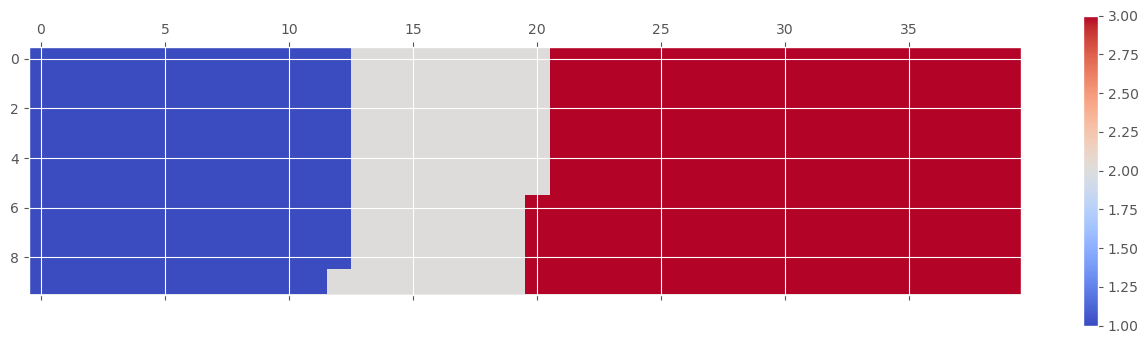

In [13]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

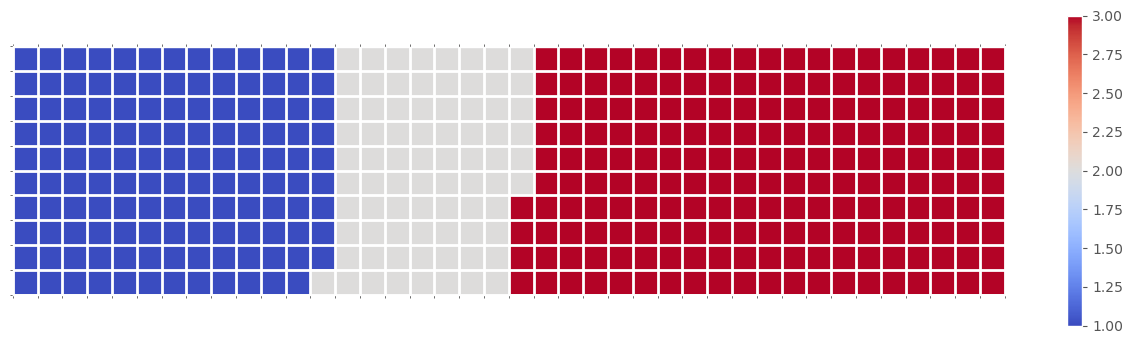

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\2463873726.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\2463873726.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\2463873726.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

<Figure size 640x480 with 0 Axes>

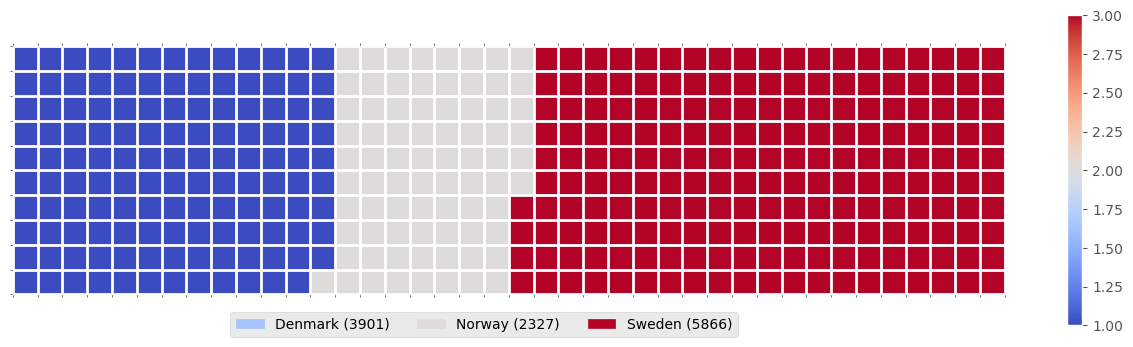

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [16]:
print(values_cumsum)
print(total_values)

Country
Denmark     3901
Norway      6228
Sweden     12094
Name: Total, dtype: int64
12094


In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [18]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\3286913405.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\3286913405.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\M-TT\AppData\Local\Temp\ipykernel_9680\3286913405.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

<Figure size 640x480 with 0 Axes>

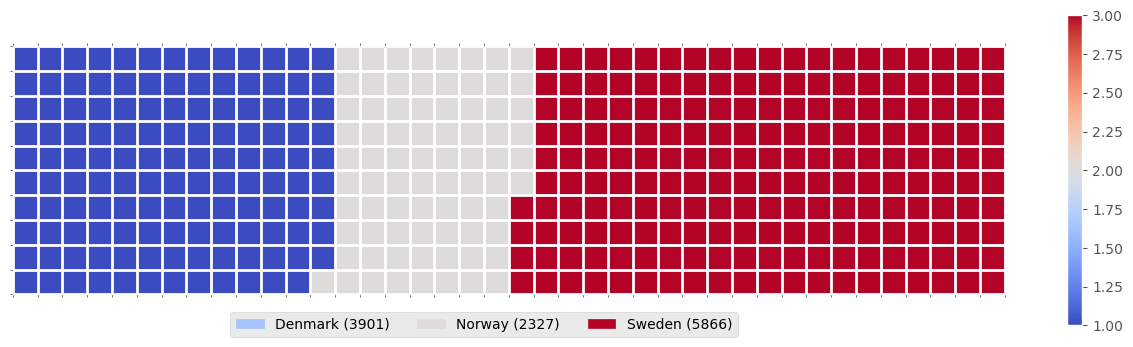

In [19]:
create_waffle_chart(categories, values, height, width, colormap)

## PyWaffle

In [20]:
from pywaffle import Waffle

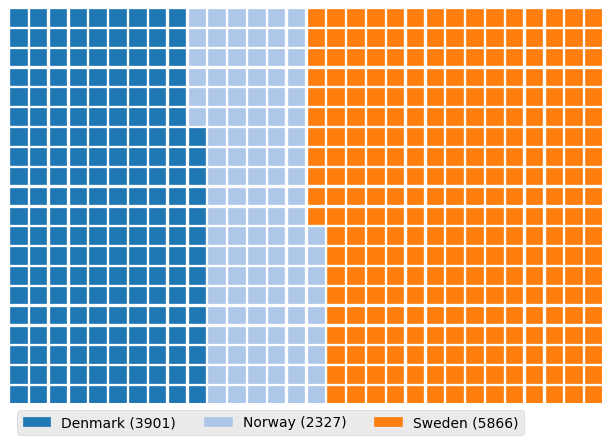

In [21]:
fig = plt.figure(FigureClass = Waffle,
                 rows=20, columns=30,
                 values=df_dsn['Total'],
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values, df_dsn.Total)],
                           'loc': 'lower left', 'bbox_to_anchor':(0,-0.1), 'ncol':3}
                           
                )

plt.show()

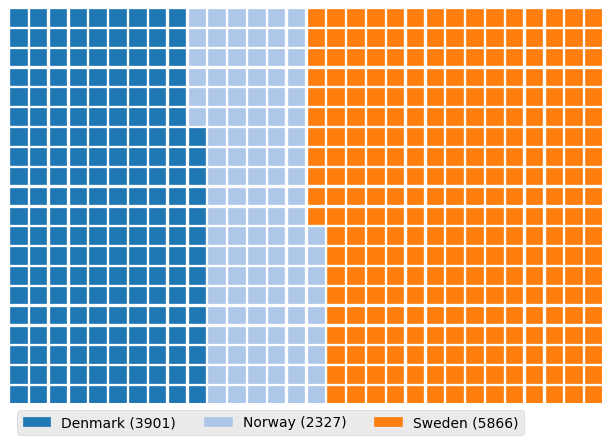

In [22]:

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

In [23]:
df_CI = df_can.loc[['India', 'China'], 'Total']
df_CI

Country
India    691904
China    659962
Name: Total, dtype: int64

In [24]:
df_CI_total = df_CI.sum()

In [25]:
df_CI = df_can.loc[['India', 'China'], :]
df_CI

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


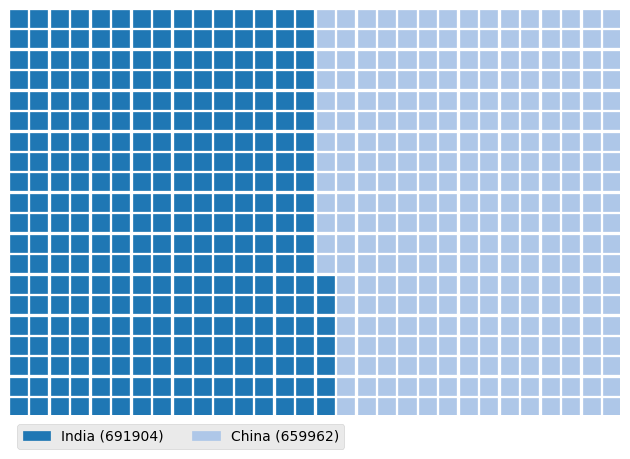

In [26]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_CI['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_CI.index.values,df_CI.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 2}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

plt.show()

### Word Cloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import urllib


In [28]:
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [29]:
stopwords = set(STOPWORDS)

In [30]:
alice_wc = WordCloud()

alice_wc.generate(alice_novel)

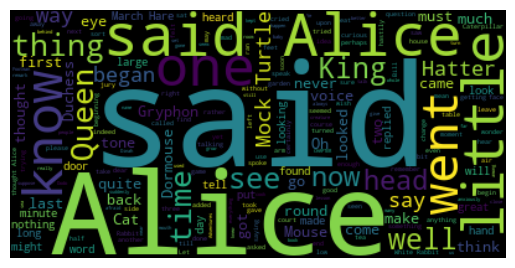

In [31]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

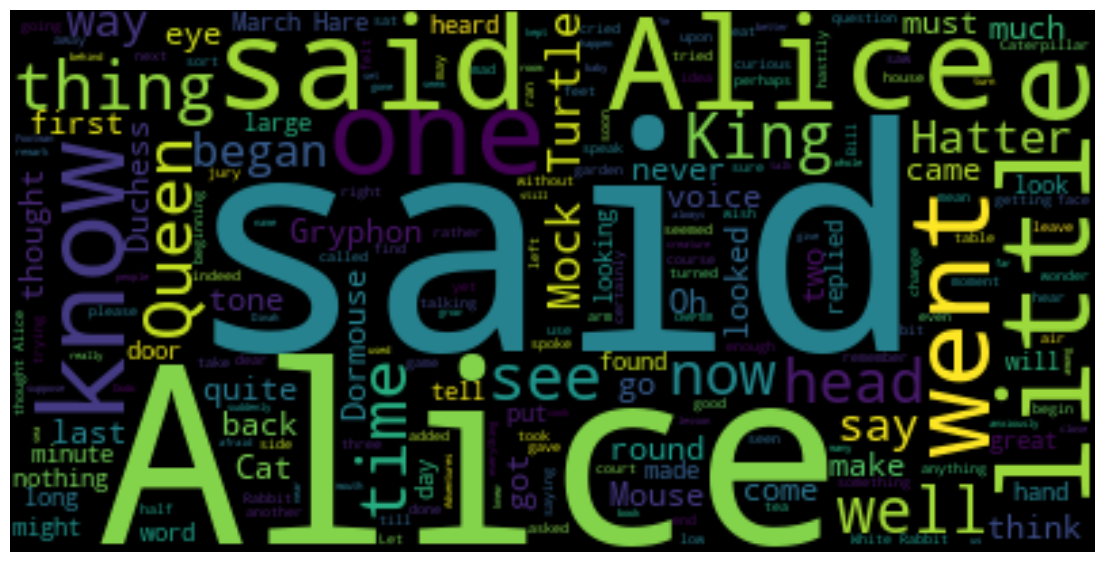

In [32]:
fig = plt.figure(figsize=(14,18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

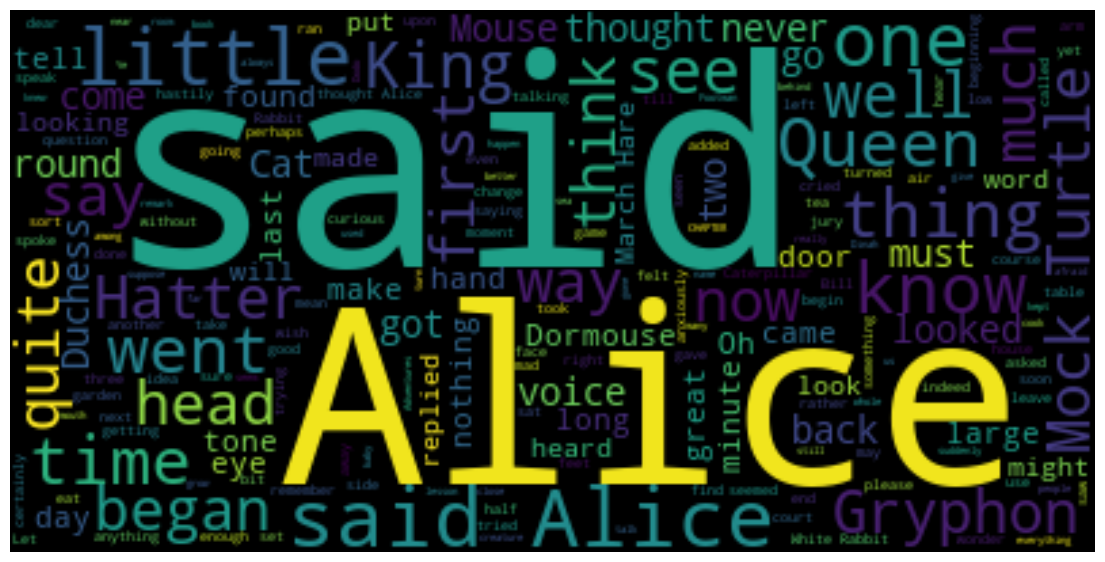

In [33]:
stopwords.add('said') # add the words said to stopwords
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

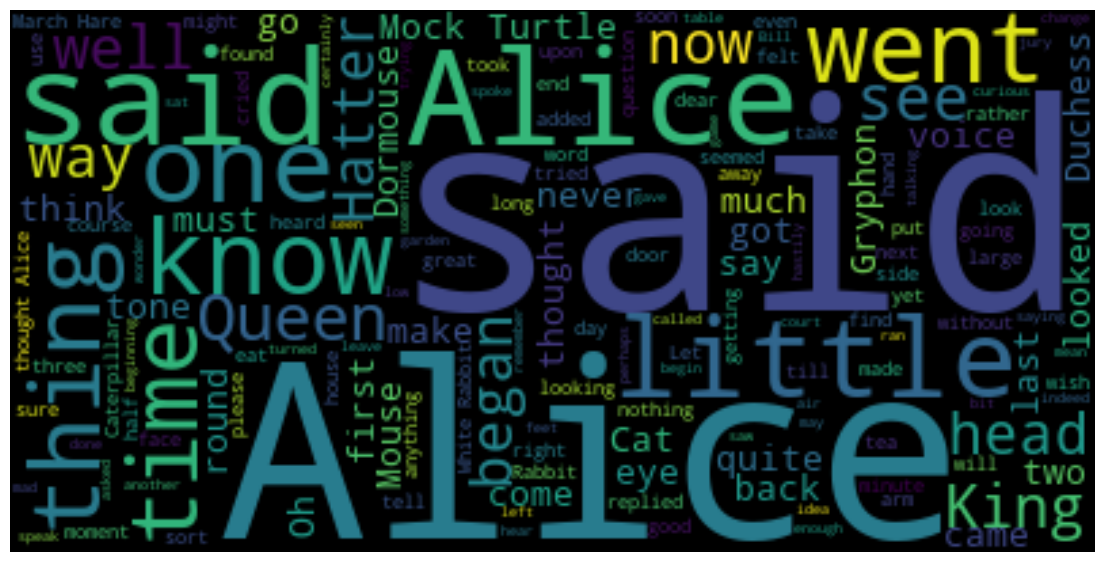

In [34]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

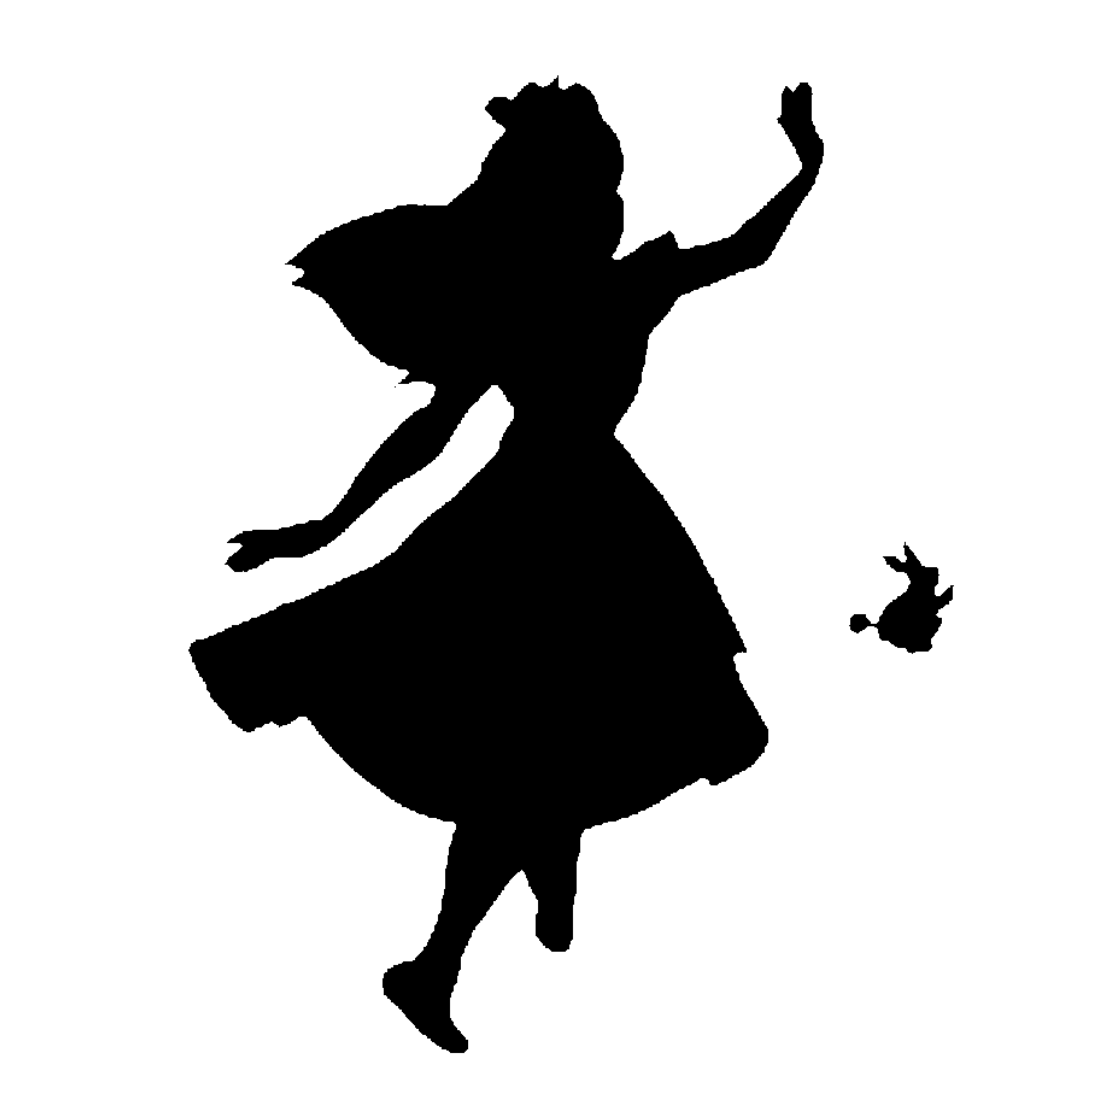

In [36]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

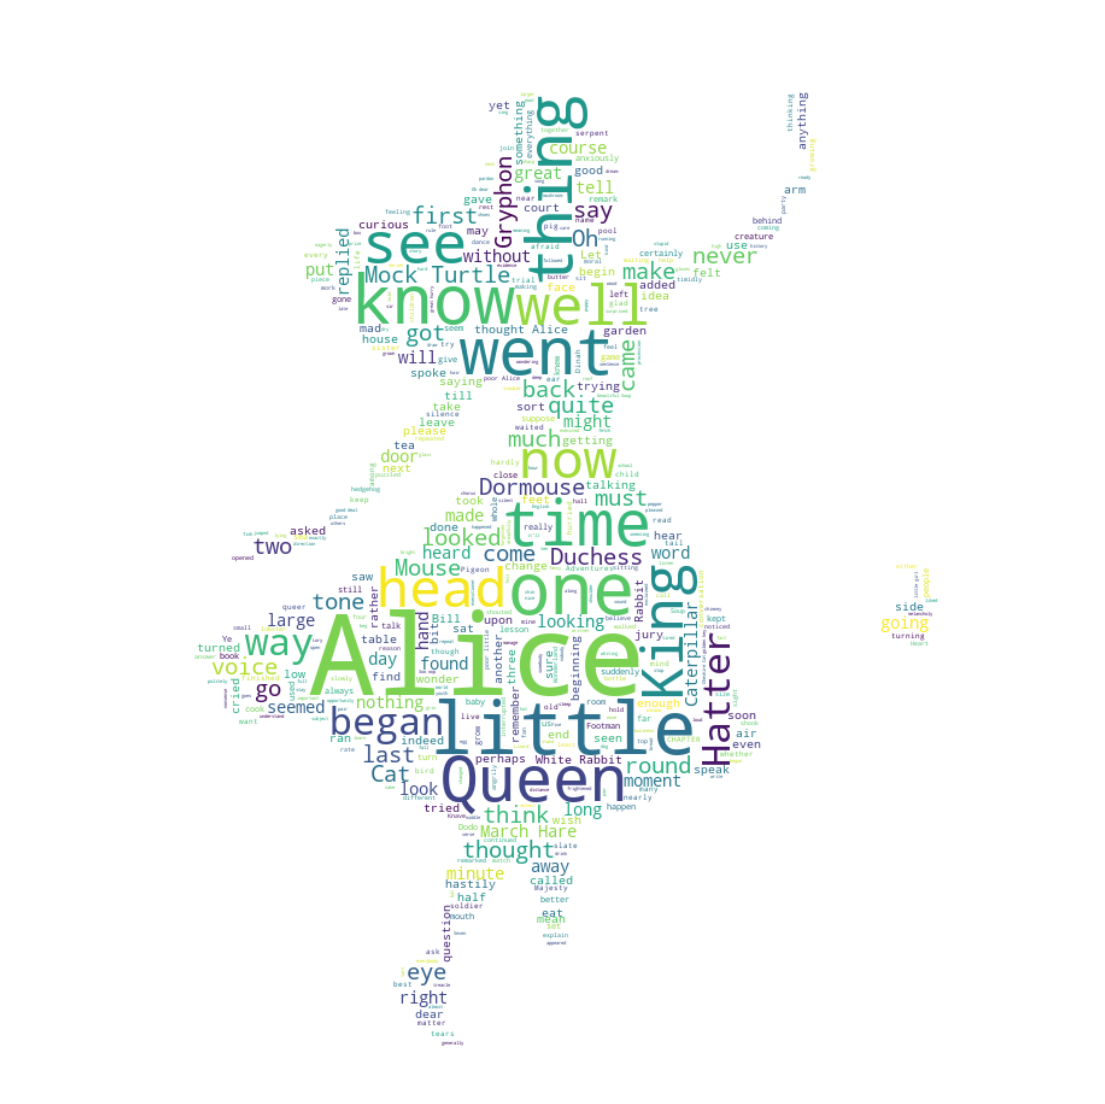

In [37]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [39]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total']/total_immigration*max_words)
        word_string = word_string + ((country + ' ')*repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [40]:
word_cloud = WordCloud(background_color='white').generate(word_string)


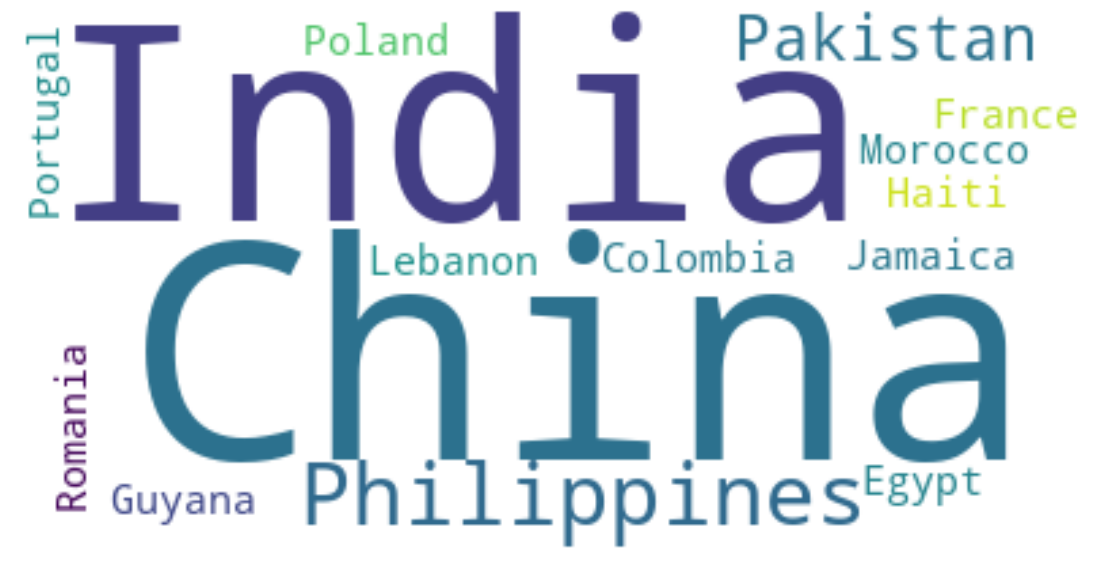

In [41]:
plt.figure(figsize=(14,18))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

### Seaborn and Regression Plots

In [42]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

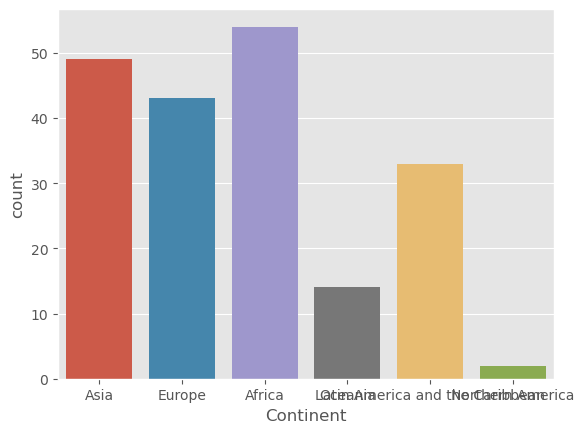

In [43]:
sns.countplot(x='Continent', data=df_can)

In [44]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

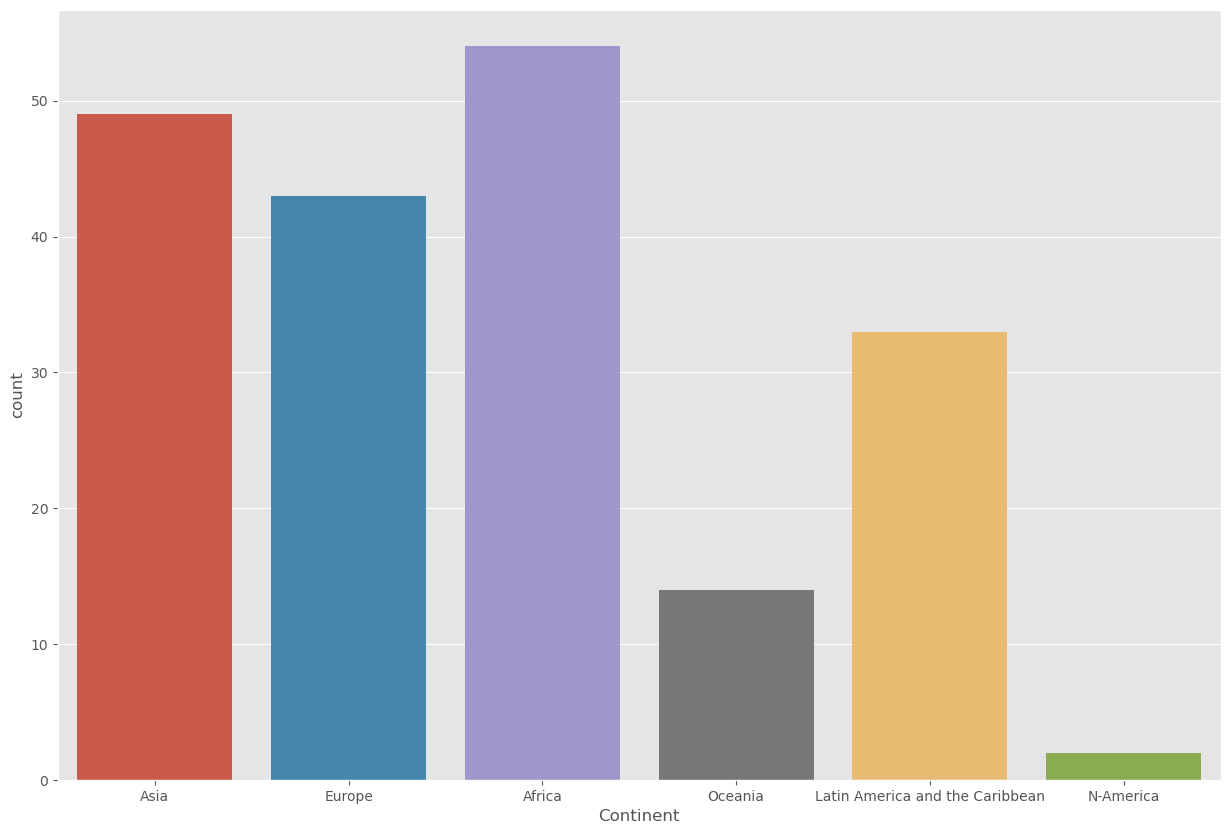

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data=df_can1)

<Axes: xlabel='Continent', ylabel='Total'>

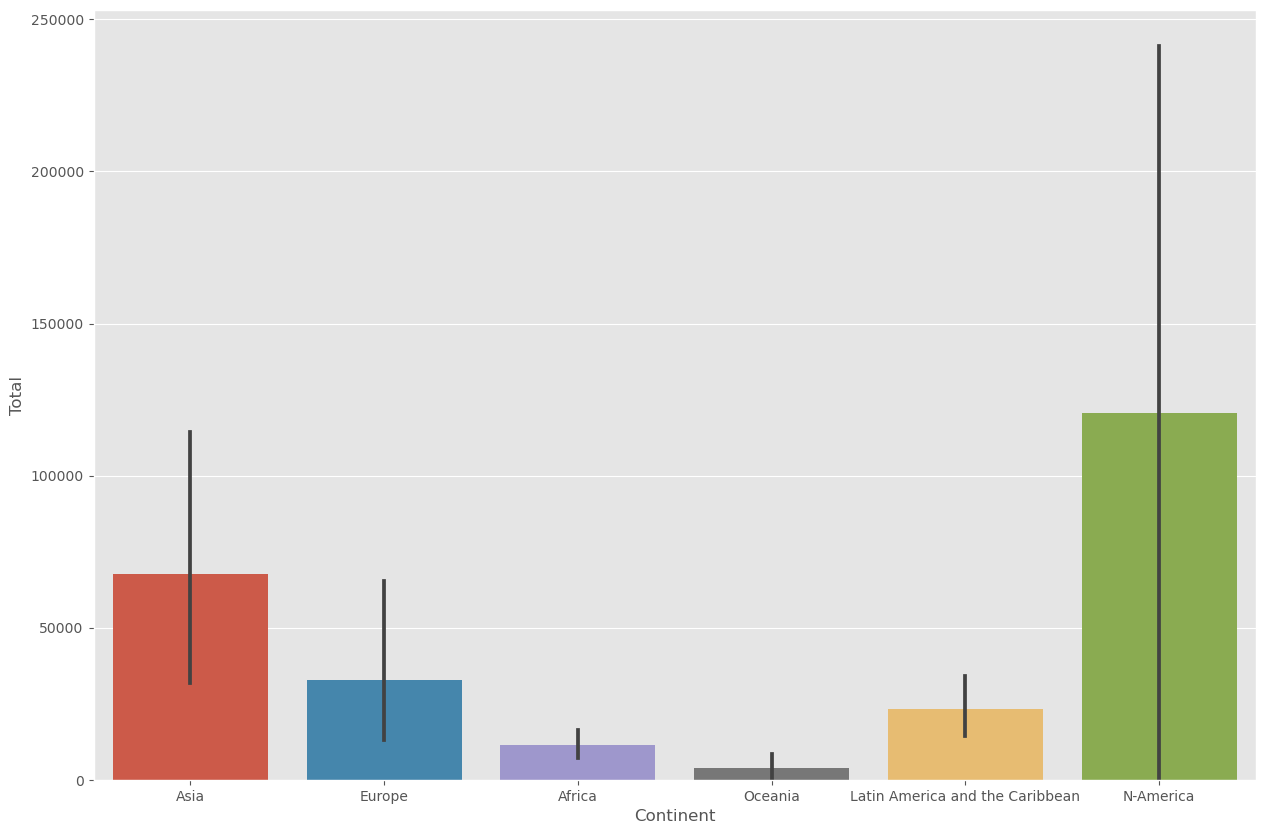

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent', y='Total', data=df_can1)

In [47]:
df_can2 = df_can1.groupby('Continent')['Total'].mean()
df_can2

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              32812.720930
Latin America and the Caribbean     23186.303030
N-America                          120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64

In [48]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)
# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()


,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

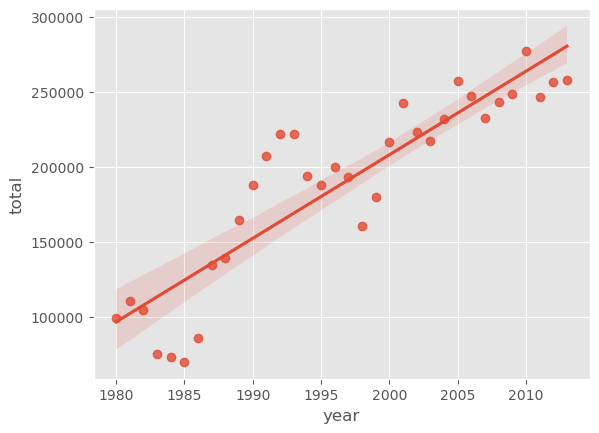

In [49]:
sns.regplot(x='year', y='total', data=df_tot)

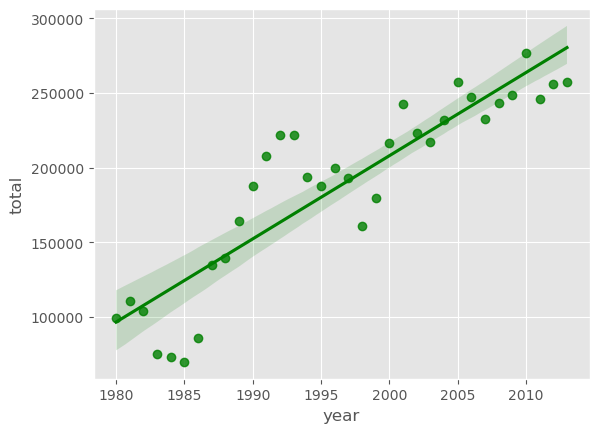

In [50]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

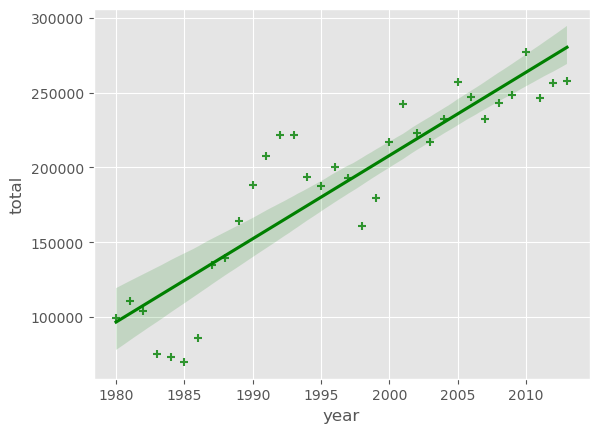

In [51]:
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

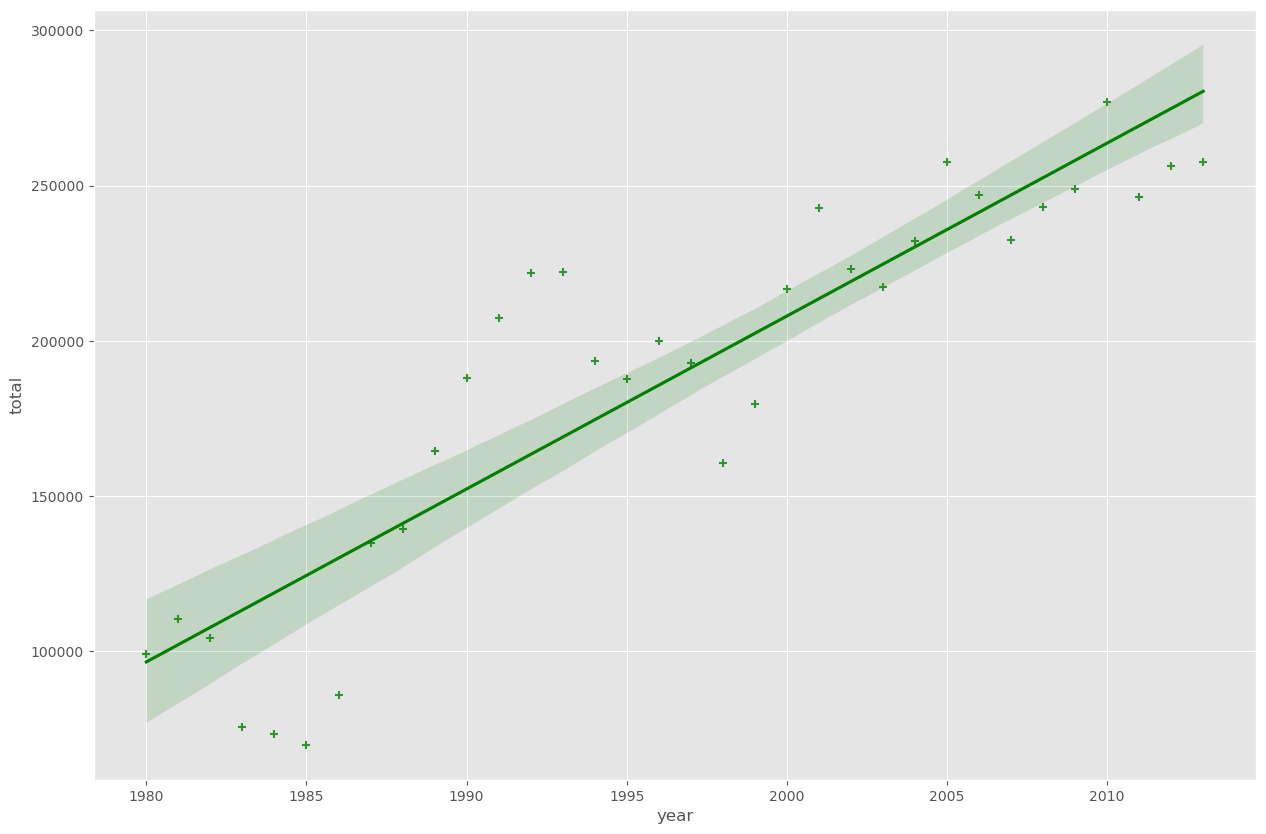

In [52]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

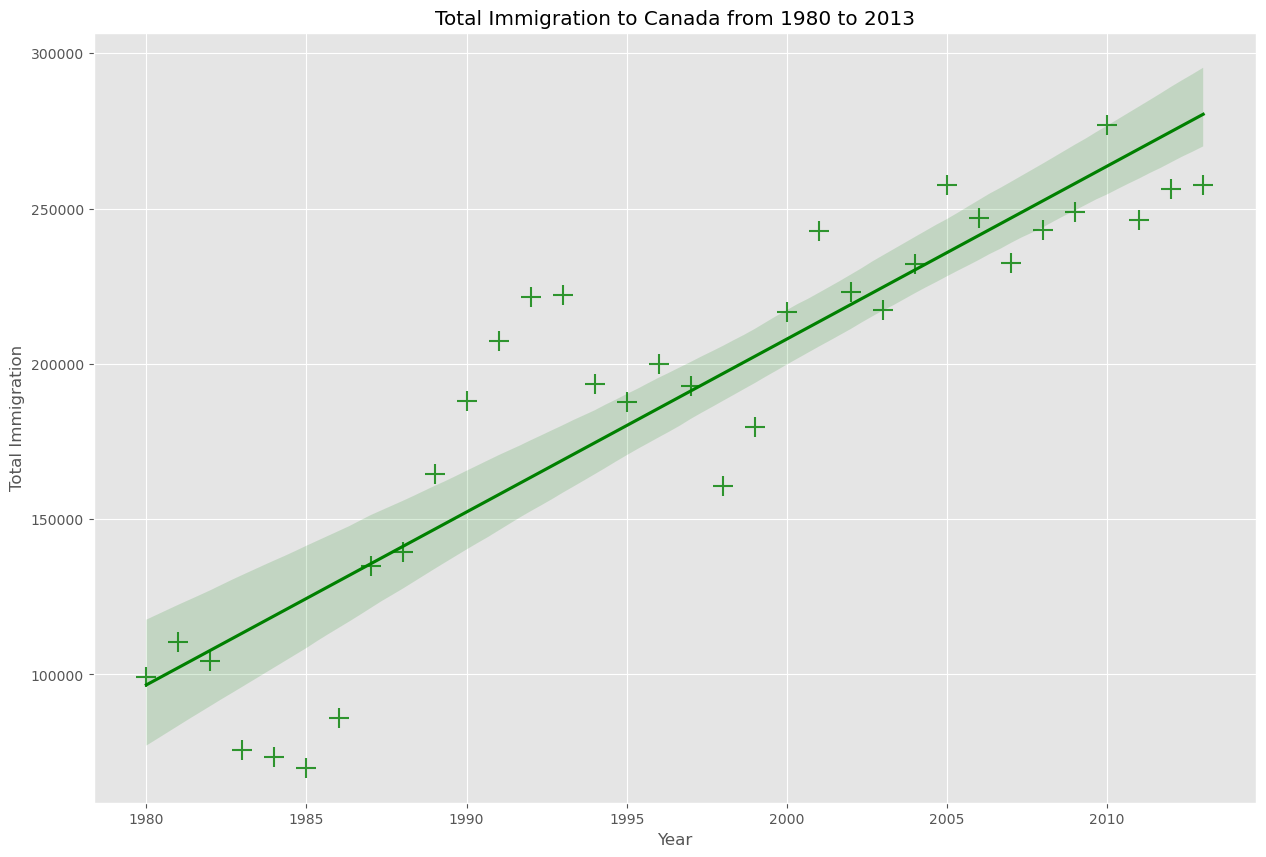

In [53]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title("Total Immigration to Canada from 1980 to 2013")
plt.show()

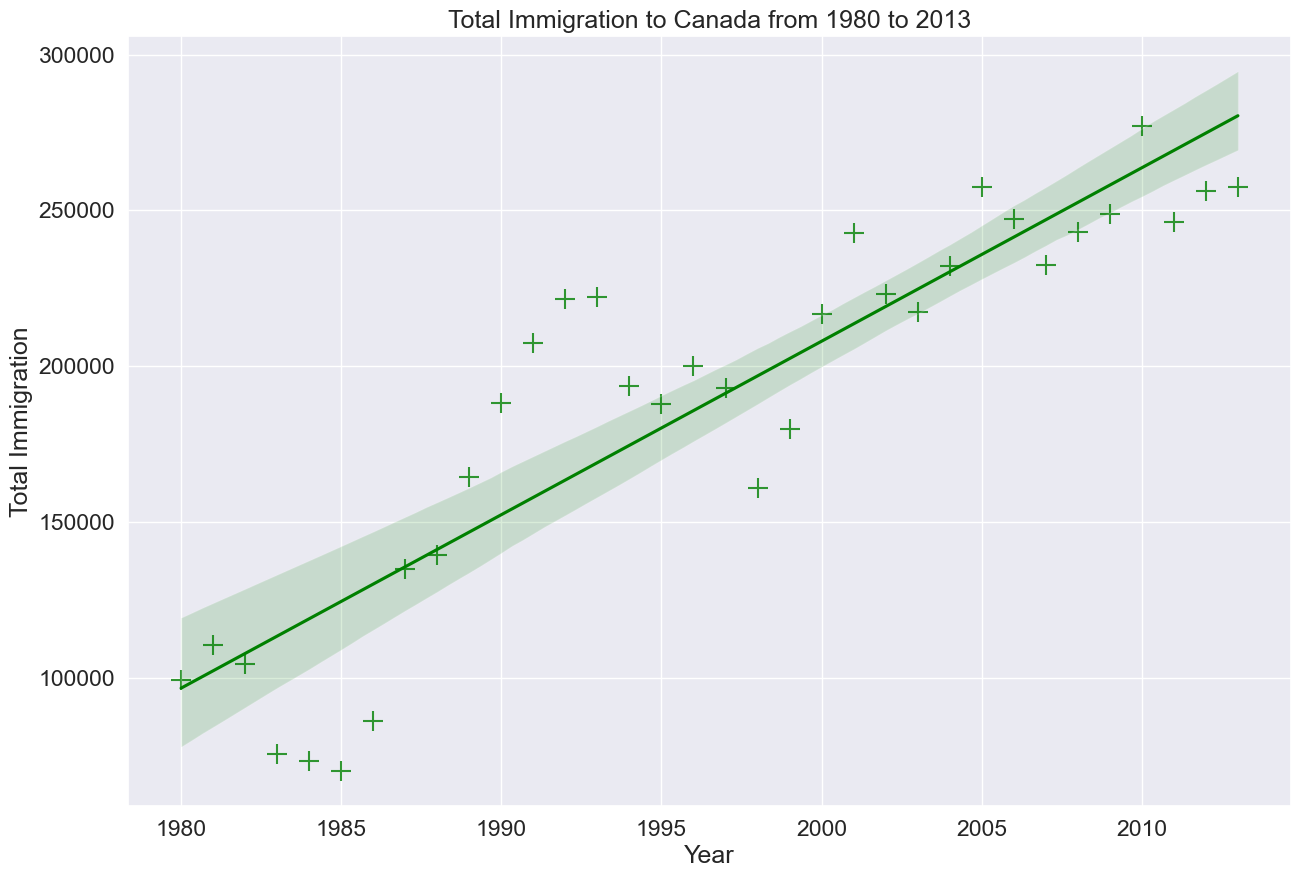

In [54]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title("Total Immigration to Canada from 1980 to 2013")
plt.show()

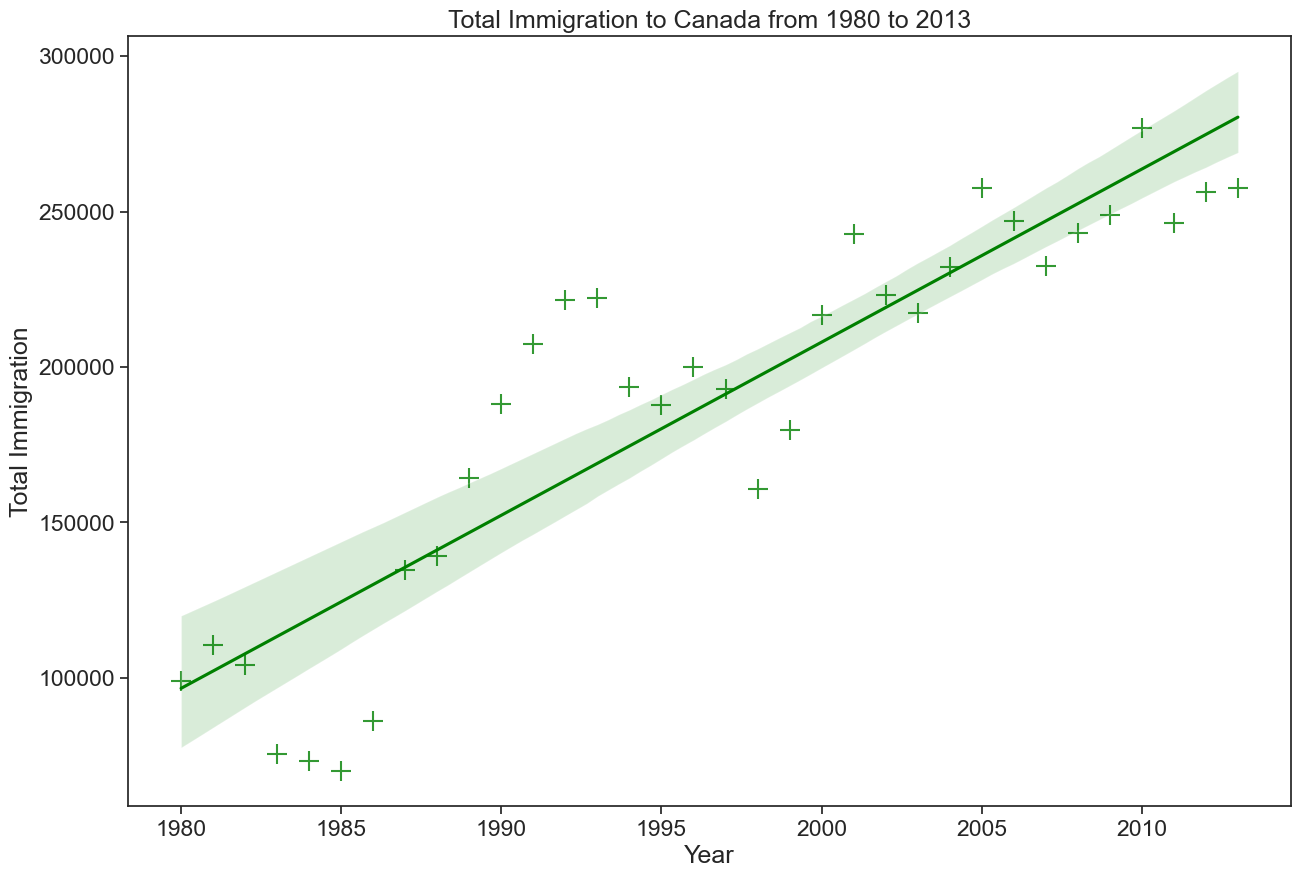

In [55]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title("Total Immigration to Canada from 1980 to 2013")
plt.show()

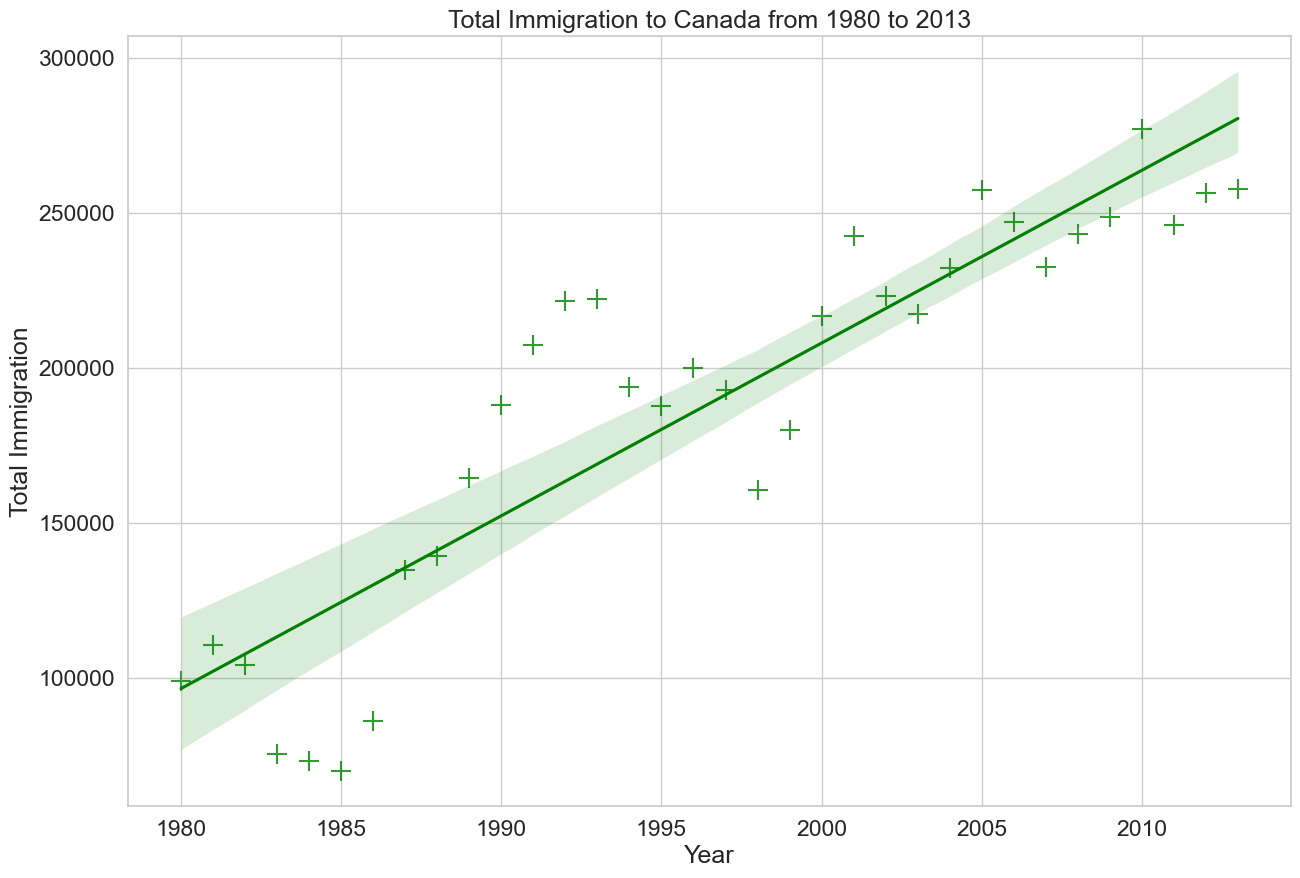

In [56]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title("Total Immigration to Canada from 1980 to 2013")
plt.show()

In [57]:
df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [59]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_dsn_reg = pd.DataFrame(df_dsn[years].sum(axis=0))
# change the years to type float (useful for regression later on)
df_dsn_reg.index = map(float, df_dsn_reg.index)
# reset the index to put in back in as a column in the df_tot dataframe
df_dsn_reg.reset_index(inplace=True)
# rename columns
df_dsn_reg.columns = ['year', 'total']

# view the final dataframe
df_dsn_reg.head()


,year,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


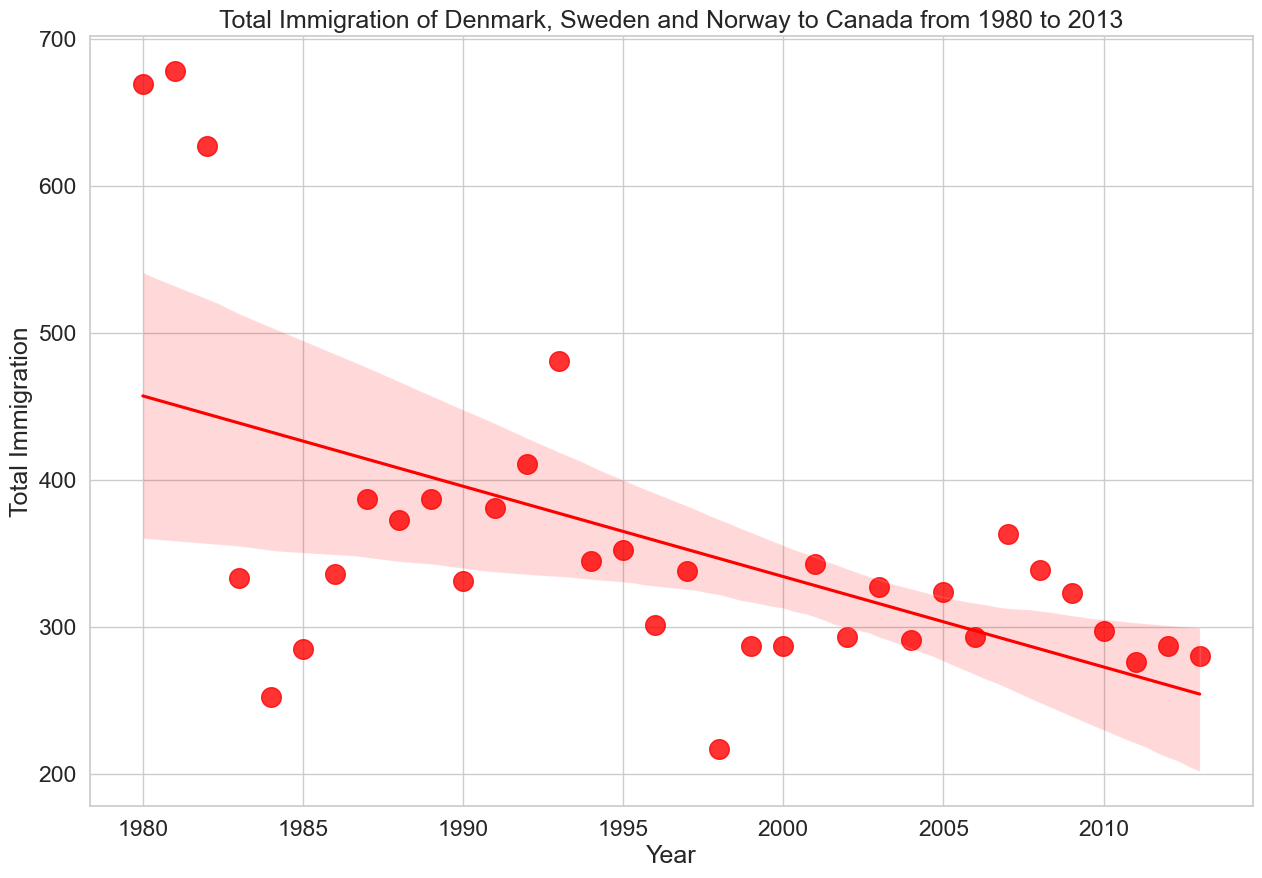

In [60]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_dsn_reg, color='red', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel="Total Immigration")
ax.set_title("Total Immigration of Denmark, Sweden and Norway to Canada from 1980 to 2013")
plt.show()

In [62]:
df_dsn.tail()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
